In [36]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train_mat  = pd.read_csv('E:\project\FINAL\student-eca.csv')
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,4,3,3,1,1,5,7,18,19,19
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,5,4,4,1,1,5,10,0,0,0
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,5,4,3,1,1,5,9,17,20,18
3,ECA,F,22,U,GT3,T,4,4,services,services,...,5,4,3,1,1,5,6,17,18,16
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,4,4,4,1,1,5,8,10,12,14


In [39]:
train_mat.shape
train_mat.dropna().shape #no null values in train_mat

(59, 33)

In [40]:
subset=train_mat.columns
train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape    #no duplicates in train_mat

(59, 33)

In [41]:
train_mat['subject']='DSP'
train=pd.concat([train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,3,3,1,1,5,7,18,19,19,DSP
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,4,4,1,1,5,10,0,0,0,DSP
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,4,3,1,1,5,9,17,20,18,DSP
3,ECA,F,22,U,GT3,T,4,4,services,services,...,4,3,1,1,5,6,17,18,16,DSP
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,4,4,1,1,5,8,10,12,14,DSP


In [42]:
train.to_csv('E:\project\FINAL\studentseca.csv', index=False)

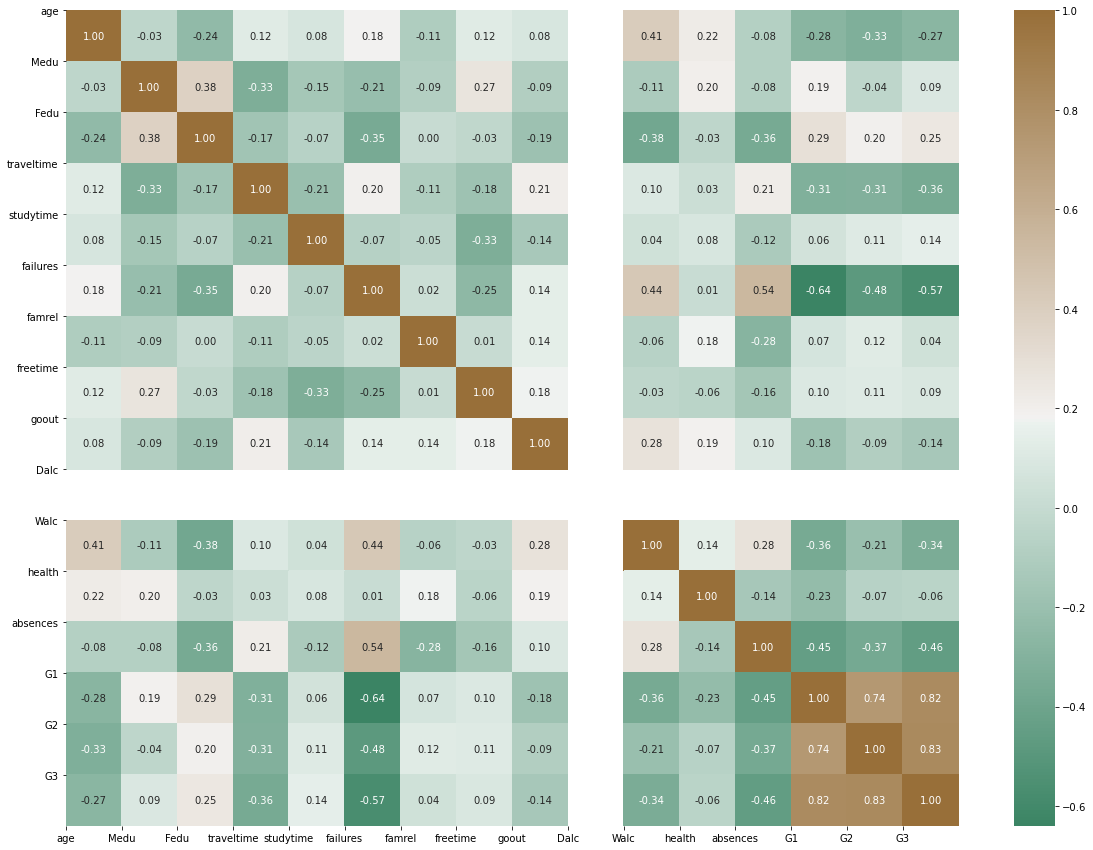

In [43]:
data = pd.read_csv('E:\project\FINAL\studentseca.csv')

def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(150,50, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlationeca.png', bbox_inches='tight')
    plt.show()

correlation(data)

In [46]:
# convert finalscore to categorical variable
data = pd.read_csv('E:\project\FINAL\studentseca.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head()

# data.drop(['Grade'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,3,1,1,5,7,18,19,19,DSP,Excellent
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,4,1,1,5,10,0,0,0,DSP,Failure
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,3,1,1,5,9,17,20,18,DSP,Excellent
3,ECA,F,22,U,GT3,T,4,4,services,services,...,3,1,1,5,6,17,18,16,DSP,Good
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,4,1,1,5,8,10,12,14,DSP,Satisfactory


In [47]:
#absences - number of school absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,1,1,5,7,18,19,19,DSP,Excellent,Always Regular
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,1,1,5,10,0,0,0,DSP,Failure,Mostly Regular
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,1,1,5,9,17,20,18,DSP,Excellent,Always Regular
3,ECA,F,22,U,GT3,T,4,4,services,services,...,1,1,5,6,17,18,16,DSP,Good,Always Regular
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,1,1,5,8,10,12,14,DSP,Satisfactory,Always Regular


In [48]:
data['Grade1'] = 'na'
data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data['Grade2'] = 'na'
data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,5,7,18,19,19,DSP,Excellent,Always Regular,Excellent,Excellent
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,5,10,0,0,0,DSP,Failure,Mostly Regular,Failure,Failure
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,5,9,17,20,18,DSP,Excellent,Always Regular,Good,Excellent
3,ECA,F,22,U,GT3,T,4,4,services,services,...,5,6,17,18,16,DSP,Good,Always Regular,Good,Excellent
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,5,8,10,12,14,DSP,Satisfactory,Always Regular,Poor,Satisfactory


In [49]:
data.shape


(59, 38)

In [50]:
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,5,7,18,19,19,DSP,Excellent,Always Regular,Excellent,Excellent
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,5,10,0,0,0,DSP,Failure,Mostly Regular,Failure,Failure
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,5,9,17,20,18,DSP,Excellent,Always Regular,Good,Excellent
3,ECA,F,22,U,GT3,T,4,4,services,services,...,5,6,17,18,16,DSP,Good,Always Regular,Good,Excellent
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,5,8,10,12,14,DSP,Satisfactory,Always Regular,Poor,Satisfactory
5,ECA,F,22,U,GT3,T,4,4,health,Services,...,4,12,20,20,18,DSP,Excellent,Mostly Regular,Excellent,Excellent
6,ECA,M,22,U,LE3,T,4,4,other,Teacher,...,5,12,16,15,15,DSP,Good,Mostly Regular,Good,Good
7,ECA,M,22,R,GT3,T,2,2,at_home,other,...,4,24,4,13,6,DSP,Poor,Mostly Regular,Failure,Satisfactory
8,ECA,F,22,U,GT3,T,3,3,at_home,at_home,...,5,11,7,9,11,DSP,Satisfactory,Mostly Regular,Poor,Poor
9,ECA,F,22,U,GT3,T,3,3,at_home,other,...,3,13,17,11,14,DSP,Satisfactory,Mostly Regular,Good,Satisfactory


In [51]:
data.to_csv(r'E:\project\FINAL\featureseca.csv', index=False)